In [ ]:
!pip install pandas pandasql

  Preparing metadata (setup.py) ... done
  Created wheel for pandasql: filename=pandasql-0.7.3-py3-none-any.whl size=26772 sha256=5d8e86f5735012ce1ecea2cf4eb123e2433da7fd0363af51c7ac3d2f1e4e0069
  Stored in directory: /root/.cache/pip/wheels/e9/bc/3a/8434bdcccf5779e72894a9b24fecbdcaf97940607eaf4bcdf9
Successfully built pandasql


In [ ]:
import pandas as pd
import sqlite3


df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Project Datasets/Play Store Data.csv',encoding='unicode_escape')

In [ ]:
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
conn = sqlite3.connect('playstore.db')

df.to_sql('playstore',conn,if_exists='replace',index=False)

conn.close()

In [ ]:
conn = sqlite3.connect('playstore.db')

conn.commit()
user = pd.read_sql('SELECT * FROM playstore',conn)

In [ ]:
pd.read_sql('SELECT * FROM playstore',conn)

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#**Top Rated App Names**

In [ ]:
pd.read_sql('''SELECT Category, App, Rating
FROM playstore
WHERE Rating IS NOT NULL
ORDER BY Rating DESC
LIMIT 10;

''',conn)

,Category,App,Rating
0,1.9,Life Made WI-Fi Touchscreen Photo Frame,19.0
1,COMICS,Hojiboy Tojiboyev Life Hacks,5.0
2,DATING,American Girls Mobile Numbers,5.0
3,DATING,Awake Dating,5.0
4,DATING,Spine- The dating app,5.0
5,DATING,Girls Live Talk - Free Text and Video Chat,5.0
6,DATING,Online Girls Chat Group,5.0
7,DATING,Speeding Joyride & Car Meet App,5.0
8,EVENTS,SUMMER SONIC app,5.0
9,EVENTS,Prosperity,5.0


#Top Most Categories

In [ ]:
pd.read_sql('''SELECT Category,count(*)
FROM playstore
group by category
order by count(*) DESC
LIMIT 20
''',conn)

,Category,count(*)
0,FAMILY,1972
1,GAME,1144
2,TOOLS,843
3,MEDICAL,463
4,BUSINESS,460
5,PRODUCTIVITY,424
6,PERSONALIZATION,392
7,COMMUNICATION,387
8,SPORTS,384
9,LIFESTYLE,382


#Average Rating per Category


In [ ]:
pd.read_sql('''SELECT Category, AVG(Rating) AS Average_Rating
FROM playstore
WHERE Rating IS NOT NULL
GROUP BY Category
ORDER BY Average_Rating DESC;

''',conn)

,Category,Average_Rating
0,1.9,19.000000
1,EVENTS,4.435556
2,EDUCATION,4.389032
3,ART_AND_DESIGN,4.358065
4,BOOKS_AND_REFERENCE,4.346067
5,PERSONALIZATION,4.335987
6,PARENTING,4.300000
7,GAME,4.286326
8,BEAUTY,4.278571
9,HEALTH_AND_FITNESS,4.277104


#Most Reviewed Apps

In [ ]:
pd.read_sql('''SELECT App, Reviews
FROM playstore
ORDER BY Reviews DESC
LIMIT 10;


''',conn)

,App,Reviews
0,GollerCepte Live Score,9992
1,Ad Block REMOVER - NEED ROOT,999
2,SnipSnap Coupon App,9975
3,SnipSnap Coupon App,9975
4,US Open Tennis Championships 2018,9971
5,US Open Tennis Championships 2018,9971
6,DreamTrips,9971
7,Adult Color by Number Book - Paint Mandala Pages,997
8,BSPlayer ARMv7 VFP CPU support,9966
9,"Easy Resume Builder, Resume help, Curriculum v...",996


#**Distribution of free versus paid apps**

In [ ]:
pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type;

''',conn)

,Type,Count
0,None,1
1,0,1
2,Free,10039
3,Paid,800


In [ ]:
pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type
having Type='Free'

''',conn)

,Type,Count
0,Free,10039


In [ ]:
pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type
having Type='Paid'

''',conn)

,Type,Count
0,Paid,800


In [ ]:
pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type
having Type in ('Paid','Free')

''',conn)

,Type,Count
0,Free,10039
1,Paid,800


In [ ]:
pd.read_sql('''SELECT type,AVG(price) AS Average_Price
FROM playstore
WHERE Type in ('Free','Paid');

''',conn)


,Type,Average_Price
0,Free,0.0


#**Analyze the distribution of app sizes to identify common sizes.**

In [ ]:
pd.read_sql('''SELECT Size, COUNT(*) AS Count
FROM playstore
WHERE Size IS NOT NULL
GROUP BY Size
ORDER BY Size ASC;

''',conn)

,Size,Count
0,"1,000+",1
1,1.0M,7
2,1.1M,32
3,1.2M,41
4,1.3M,35
...,...,...
457,98M,16
458,992k,1
459,994k,1
460,99M,39


#**Most installed apps**

In [ ]:
pd.read_sql(''' select app,sum(installs) from playstore
where app='Pixel Draw - Number Art Coloring Book'
group by app

''',conn)

,App,sum(installs)
0,Pixel Draw - Number Art Coloring Book,100.0


In [ ]:
pd.read_sql(''' select app,sum(installs) from playstore
group by app
order by sum(installs) desc

''',conn)

,App,sum(installs)
0,Candy Crush Saga,3500.0
1,Temple Run 2,3000.0
2,Viber Messenger,2500.0
3,imo free video calls and chat,2000.0
4,Snapchat,2000.0
...,...,...
9655,Command & Conquer: Rivals,0.0
9656,CX Network,0.0
9657,Ak Parti YardÄ±m Toplama,0.0
9658,Ain Arabic Kids Alif Ba ta,0.0


#**Number of times each app is tried to install**

In [ ]:
pd.read_sql('''select app,installs
from playstore
where app='ROBLOX'

''',conn)

,App,Installs
0,ROBLOX,"100,000,000+"
1,ROBLOX,"100,000,000+"
2,ROBLOX,"100,000,000+"
3,ROBLOX,"100,000,000+"
4,ROBLOX,"100,000,000+"
5,ROBLOX,"100,000,000+"
6,ROBLOX,"100,000,000+"
7,ROBLOX,"100,000,000+"
8,ROBLOX,"100,000,000+"


In [ ]:
pd.read_sql('''SELECT App,count(Installs) as count_times_installed
FROM playstore
group by App

ORDER BY count_times_installed desc

''',conn)

,App,count_times_installed
0,ROBLOX,9
1,"CBS Sports App - Scores, News, Stats & Watch Live",8
2,ESPN,7
3,Duolingo: Learn Languages Free,7
4,Candy Crush Saga,7
...,...,...
9655,/u/app,1
9656,.R,1
9657,- Free Comics - Comic Apps,1
9658,+Download 4 Instagram Twitter,1


In [ ]:
pd.read_sql('''SELECT App,count(Installs) as total_count
FROM playstore
group by App
HAVING total_count = 0.0
ORDER BY total_count desc

''',conn)

,App,total_count


#**Most installed Genres**

In [ ]:
pd.read_sql('''SELECT genres,count(genres)
FROM playstore
group by genres
''',conn)

,Genres,count(genres)
0,Action,365
1,Action;Action & Adventure,17
2,Adventure,75
3,Adventure;Action & Adventure,13
4,Adventure;Brain Games,1
...,...,...
115,Video Players & Editors,173
116,Video Players & Editors;Creativity,2
117,Video Players & Editors;Music & Video,3
118,Weather,82


In [ ]:
pd.read_sql('''SELECT *
from playstore

''',conn)


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite â FREE Live Cool Themes, Hid...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


#See which Android versions are most commonly supported by apps

In [ ]:
pd.read_sql('''SELECT "Android Ver", COUNT(*) AS Count
FROM playstore
WHERE "Android Ver" IS NOT NULL
GROUP BY "Android Ver"
ORDER BY Count DESC;

''',conn)


,Android Ver,Count
0,4.1 and up,2451
1,4.0.3 and up,1501
2,4.0 and up,1375
3,Varies with device,1362
4,4.4 and up,980
5,2.3 and up,652
6,5.0 and up,601
7,4.2 and up,394
8,2.3.3 and up,281
9,2.2 and up,244


In [ ]:
pd.read_sql('''SELECT "Android Ver", COUNT(*) AS Count
FROM playstore

GROUP BY "Android Ver"
ORDER BY Count DESC;

''',conn)

,Android Ver,Count
0,4.1 and up,2451
1,4.0.3 and up,1501
2,4.0 and up,1375
3,Varies with device,1362
4,4.4 and up,980
5,2.3 and up,652
6,5.0 and up,601
7,4.2 and up,394
8,2.3.3 and up,281
9,2.2 and up,244


#GRAPHS

In [ ]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
k = pd.read_sql('''SELECT App, Rating,Category
FROM playstore
WHERE Rating IS NOT NULL
ORDER BY Rating DESC
LIMIT 10;
''',conn)

<Axes: xlabel='App'>

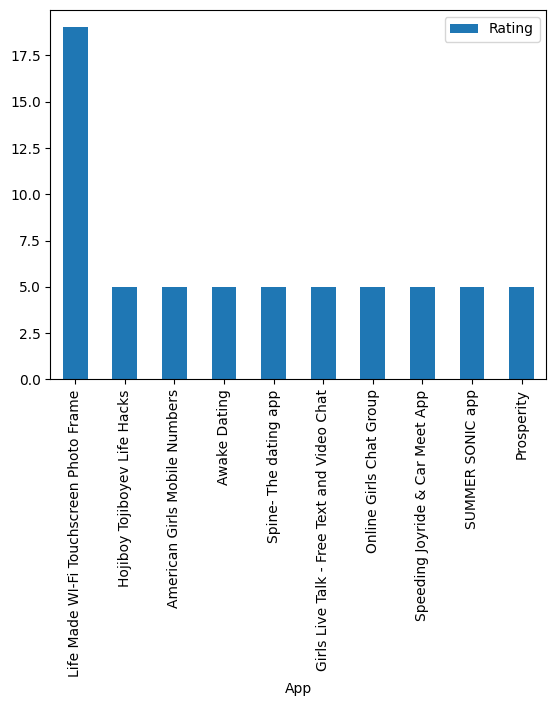

In [ ]:
k=k.set_index('App')
k.plot(kind = 'bar')

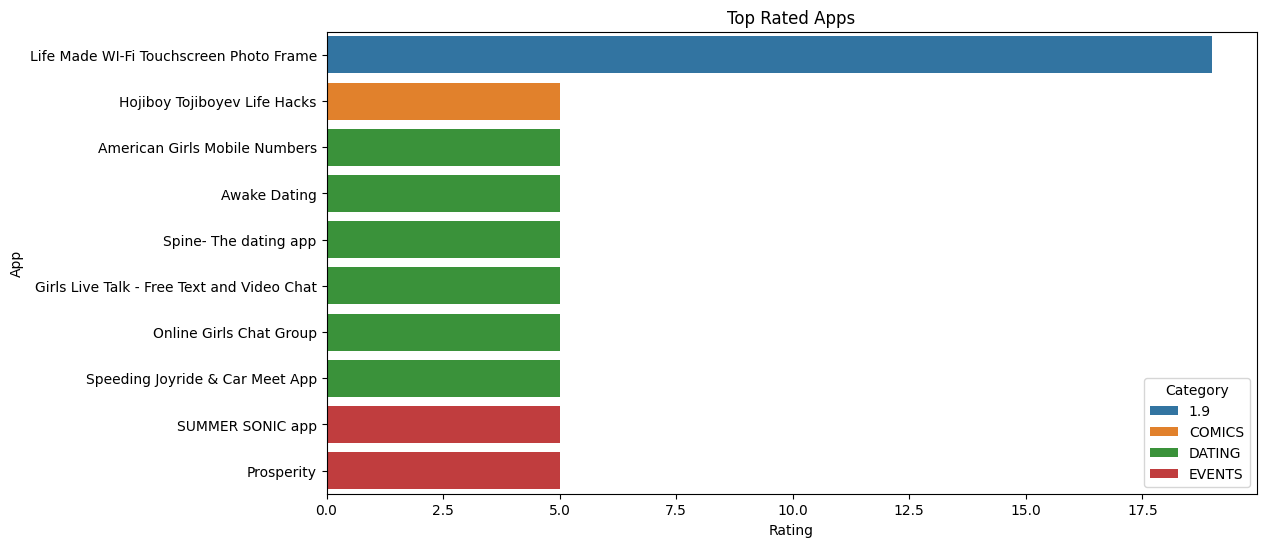

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(data=k, x='Rating', y='App',hue='Category')
plt.title('Top Rated Apps')
plt.xlabel('Rating')
plt.ylabel('App')
plt.legend(title='Category')
plt.show()

<Axes: xlabel='Category', ylabel='count(*)'>

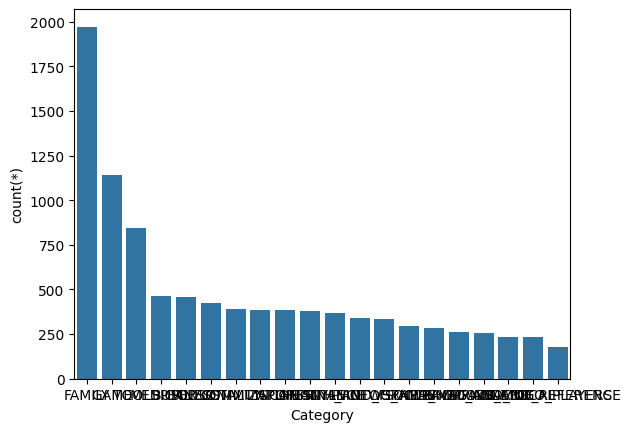

In [ ]:
a= pd.read_sql('''SELECT Category,count(*)
FROM playstore
group by category
order by count(*) DESC
LIMIT 20
''',conn)

sns.barplot(data = a,x = 'Category',y = 'count(*)')


<Axes: xlabel='Category', ylabel='Average_Rating'>

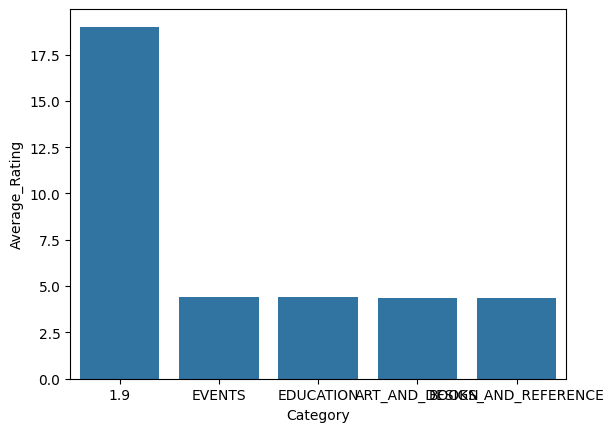

In [ ]:
b= pd.read_sql('''SELECT Category, AVG(Rating) AS Average_Rating
FROM playstore
WHERE Rating IS NOT NULL
GROUP BY Category
ORDER BY Average_Rating DESC
Limit 5;

''',conn)

sns.barplot(data = b,x = 'Category',y = 'Average_Rating')

                                                 App  Reviews
0                             GollerCepte Live Score     9992
1                       Ad Block REMOVER - NEED ROOT      999
2                                SnipSnap Coupon App     9975
3                                SnipSnap Coupon App     9975
4                  US Open Tennis Championships 2018     9971
5                  US Open Tennis Championships 2018     9971
6                                         DreamTrips     9971
7   Adult Color by Number Book - Paint Mandala Pages      997
8                     BSPlayer ARMv7 VFP CPU support     9966
9  Easy Resume Builder, Resume help, Curriculum v...      996


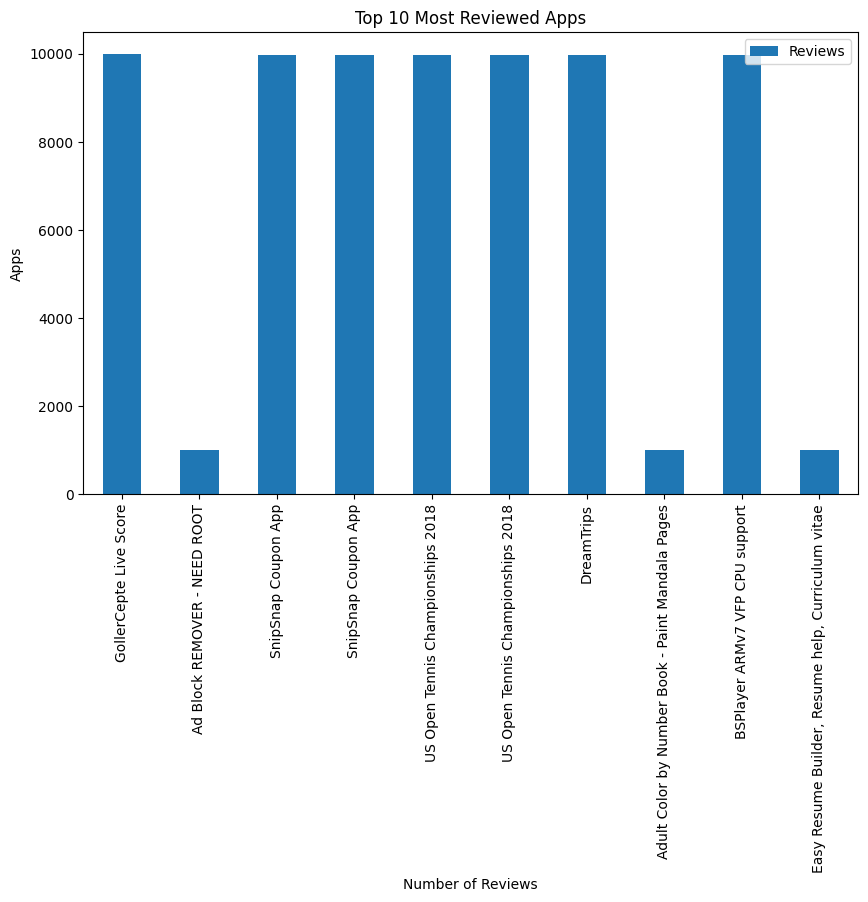

In [ ]:
c= pd.read_sql('''SELECT App, Reviews
FROM playstore
ORDER BY Reviews DESC
LIMIT 10;


''',conn)

#c.plot(kind='line')

# Convert 'Reviews' to numeric, handling any errors
c['Reviews'] = pd.to_numeric(c['Reviews'], errors='coerce')

# Check for any NaN values after conversion
print(c)

# Now plot
c.plot(kind='bar', x='App', y='Reviews', figsize=(10, 6), title='Top 10 Most Reviewed Apps')
plt.xlabel('Number of Reviews')
plt.ylabel('Apps')
plt.show()

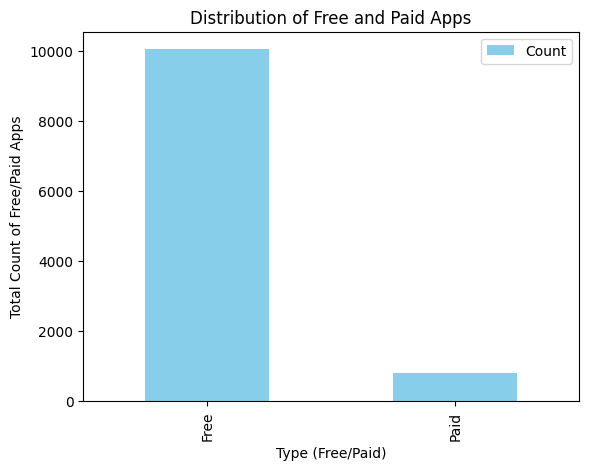

In [ ]:
d=pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type
having Type in ('Paid','Free')

''',conn)

d=d.set_index('Type')

colors = ['skyblue', 'green']  # Define your colors for 'Free' and 'Paid'

d.plot(kind='bar', color=colors)

plt.xlabel('Type (Free/Paid)')
plt.ylabel('Total Count of Free/Paid Apps')
plt.title('Distribution of Free and Paid Apps')
plt.show()






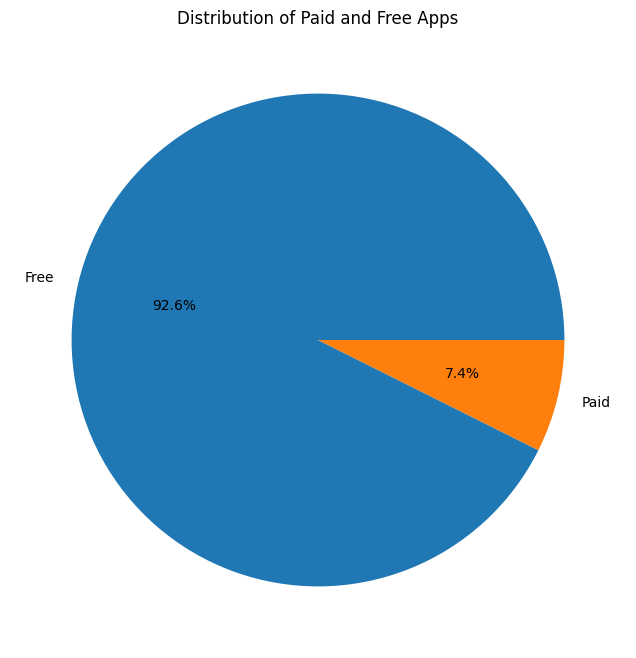

In [ ]:
d=pd.read_sql('''SELECT Type, COUNT(*) AS Count
FROM playstore
GROUP BY Type
having Type in ('Paid','Free')

''',conn)

d = d.set_index('Type')

# Plotting a pie chart
d['Count'].plot(kind='pie', autopct='%1.1f%%', figsize=(8, 8), title='Distribution of Paid and Free Apps')
plt.ylabel('')  # Hide the y-label
plt.show()

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import sqlite3

<Axes: xlabel='App'>

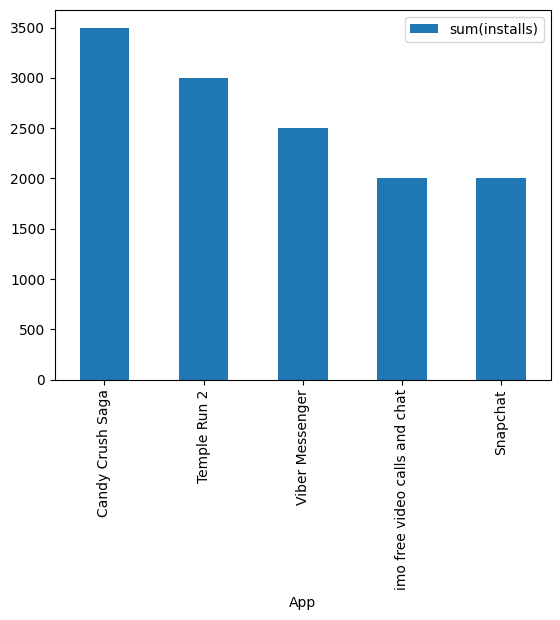

In [ ]:
f=pd.read_sql(''' select app,sum(installs) from playstore
group by app
order by sum(installs) desc
limit 5

''',conn)

f=f.set_index('App')
f.plot(kind = 'bar')


<Axes: xlabel='App'>

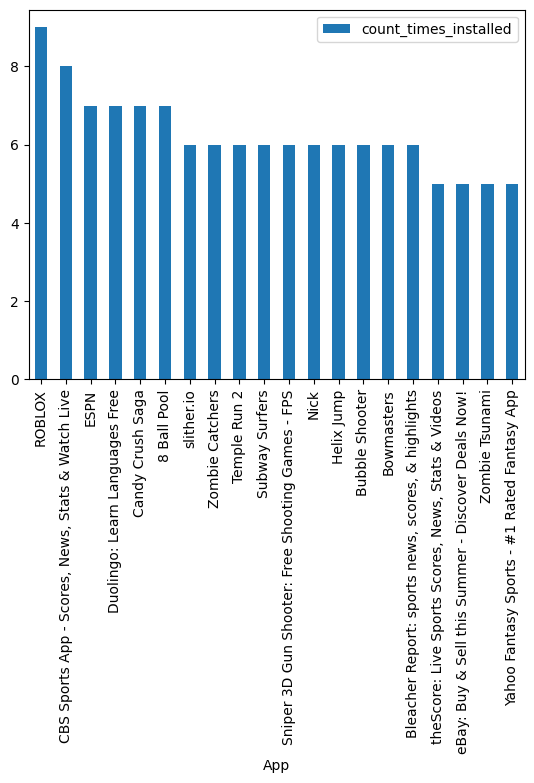

In [ ]:
h=pd.read_sql('''SELECT App,count(Installs) as count_times_installed
FROM playstore
group by App

ORDER BY count_times_installed desc
limit 20

''',conn)

h=h.set_index('App')
h.plot(kind = 'bar')

Index(['Genres', 'count(genres)'], dtype='object')


<Axes: xlabel='Genres'>

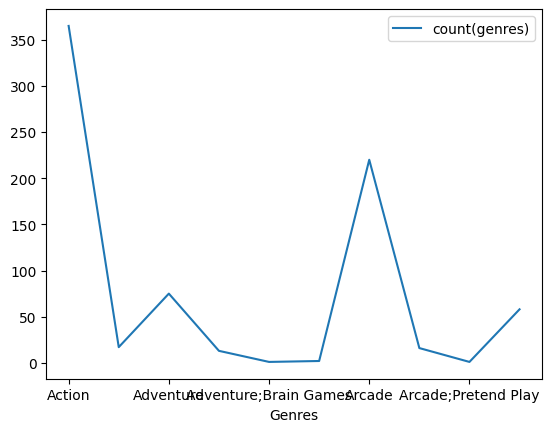

In [ ]:
m= pd.read_sql('''SELECT genres,count(genres)
FROM playstore
group by genres

limit 10
''',conn)

# Check the columns of the DataFrame
print(m.columns)

m=m.set_index('Genres')
m.plot(kind = 'line')


Index(['Android Ver', 'Count'], dtype='object')


<Axes: xlabel='Android Ver'>

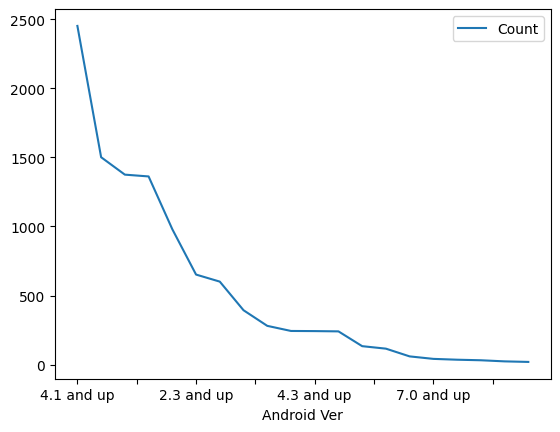

In [ ]:
p=pd.read_sql('''SELECT "Android Ver", COUNT(*) AS Count
FROM playstore
WHERE "Android Ver" IS NOT NULL
GROUP BY "Android Ver"
ORDER BY Count DESC

limit 20;

''',conn)

print(p.columns)

p=p.set_index('Android Ver')
p.plot(kind = 'line')


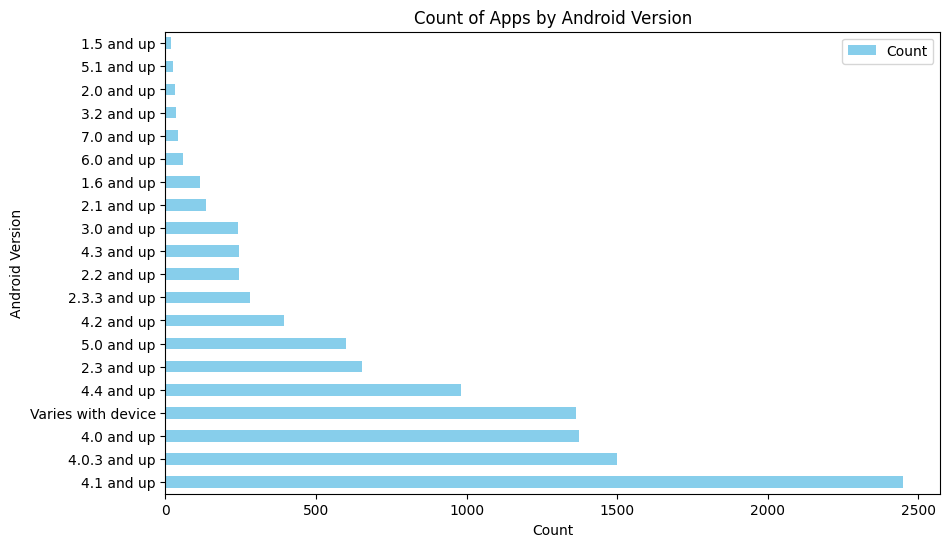

In [ ]:
# Horizontal bar plot
p.plot(kind='barh', figsize=(10, 6), color='skyblue')
plt.xlabel('Count')
plt.ylabel('Android Version')
plt.title('Count of Apps by Android Version')
plt.show()

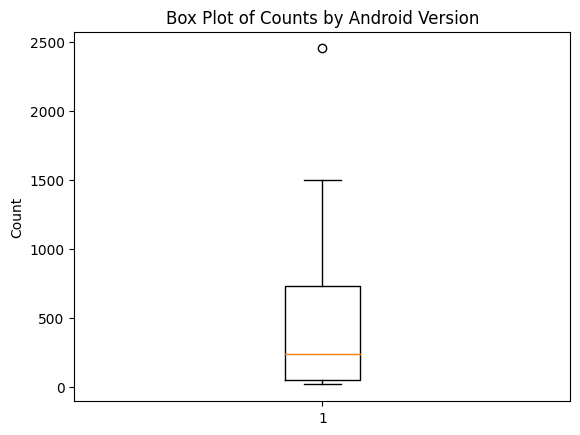

In [ ]:
# Box plot
plt.boxplot(p['Count'])
plt.ylabel('Count')
plt.title('Box Plot of Counts by Android Version')
plt.show()